In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# 한글 폰트를 적용하기 위해서 폰트 설정
import matplotlib.font_manager as fm

fontpath = '/System/Library/Fonts/Supplemental/Arial Unicode.ttf'
font = fm.FontProperties(fname=fontpath).get_name()
plt.rc('font', family=font)
%config lnlineBackend.figure_format = 'retina'

In [3]:
original_data = pd.read_excel('/Users/kimsanghun/Documents/프로젝트/빅데이터 분석 프로젝트/data/제투특별자치도.xls')
original_data.head()

,시도,군구,관광지,내/외국인,총계,2005년,2006년,2007년,2008년,2009년,...,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,제주특별자치도,제주시,(주)제주미니미니랜드,내국인,2541409.0,448307.0,397859.0,339685.0,328179.0,273278.0,...,207247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,제주특별자치도,제주시,(주)제주미니미니랜드,외국인,64193.0,11254.0,7207.0,6945.0,6692.0,5561.0,...,10270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,제주특별자치도,제주시,(주)제주미니미니랜드,합계,2605602.0,459561.0,405066.0,346630.0,334871.0,278839.0,...,217517.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,제주특별자치도,제주시,국립제주박물관,내국인,4785514.0,300548.0,299704.0,212021.0,56562.0,265822.0,...,407345.0,370421.0,332779.0,349576.0,273663.0,219463.0,337930.0,358161.0,82044.0,91022.0


In [4]:
jeju = original_data.copy()
print(jeju.shape)
jeju[1:]

(161, 22)


,시도,군구,관광지,내/외국인,총계,2005년,2006년,2007년,2008년,2009년,...,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
1,제주특별자치도,제주시,(주)제주미니미니랜드,내국인,2541409.0,448307.0,397859.0,339685.0,328179.0,273278.0,...,207247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,제주특별자치도,제주시,(주)제주미니미니랜드,외국인,64193.0,11254.0,7207.0,6945.0,6692.0,5561.0,...,10270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,제주특별자치도,제주시,(주)제주미니미니랜드,합계,2605602.0,459561.0,405066.0,346630.0,334871.0,278839.0,...,217517.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,제주특별자치도,제주시,국립제주박물관,내국인,4785514.0,300548.0,299704.0,212021.0,56562.0,265822.0,...,407345.0,370421.0,332779.0,349576.0,273663.0,219463.0,337930.0,358161.0,82044.0,91022.0
5,제주특별자치도,제주시,국립제주박물관,외국인,172402.0,1565.0,2026.0,2737.0,466.0,4185.0,...,16135.0,46037.0,13154.0,13572.0,32806.0,9778.0,5021.0,5356.0,850.0,489.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,제주특별자치도,서귀포시,한화아쿠아플라넷제주,외국인,474455.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,60425.0,221937.0,45467.0,58319.0,75879.0,11520.0,908.0
157,제주특별자치도,서귀포시,한화아쿠아플라넷제주,합계,8150696.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1234927.0,1238617.0,1416815.0,1230235.0,995558.0,903687.0,455219.0,675638.0
158,제주특별자치도,서귀포시,화락원,내국인,478767.0,182298.0,155175.0,141294.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,제주특별자치도,서귀포시,화락원,외국인,1501.0,723.0,553.0,225.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
jeju.index

RangeIndex(start=0, stop=161, step=1)

In [6]:
jeju.columns

Index(['시도', '군구', '관광지', '내/외국인', '총계', '2005년', '2006년', '2007년', '2008년',
       '2009년', '2010년', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년'],
      dtype='object')

In [7]:
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      160 non-null    object 
 1   군구      160 non-null    object 
 2   관광지     160 non-null    object 
 3   내/외국인   160 non-null    object 
 4   총계      159 non-null    float64
 5   2005년   129 non-null    float64
 6   2006년   129 non-null    float64
 7   2007년   119 non-null    float64
 8   2008년   124 non-null    float64
 9   2009년   114 non-null    float64
 10  2010년   125 non-null    float64
 11  2011년   125 non-null    float64
 12  2012년   116 non-null    float64
 13  2013년   95 non-null     float64
 14  2014년   95 non-null     float64
 15  2015년   90 non-null     float64
 16  2016년   90 non-null     float64
 17  2017년   90 non-null     float64
 18  2018년   96 non-null     float64
 19  2019년   102 non-null    float64
 20  2020년   108 non-null    float64
 21  2021년   108 non-null    float64
dtypes:

<AxesSubplot: >

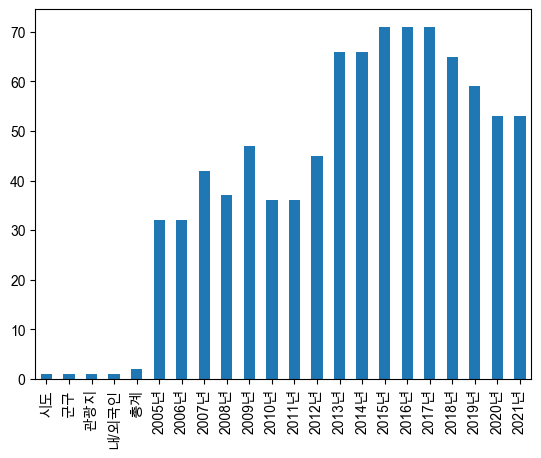

In [8]:
n = jeju.isnull().sum()
n.plot.bar()

<AxesSubplot: >

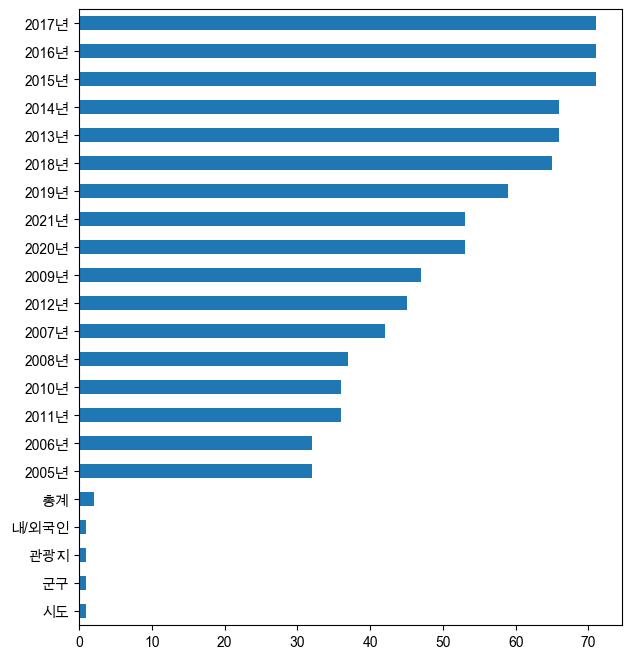

In [9]:
n.sort_values().plot.barh(figsize=(7, 8))

<AxesSubplot: >

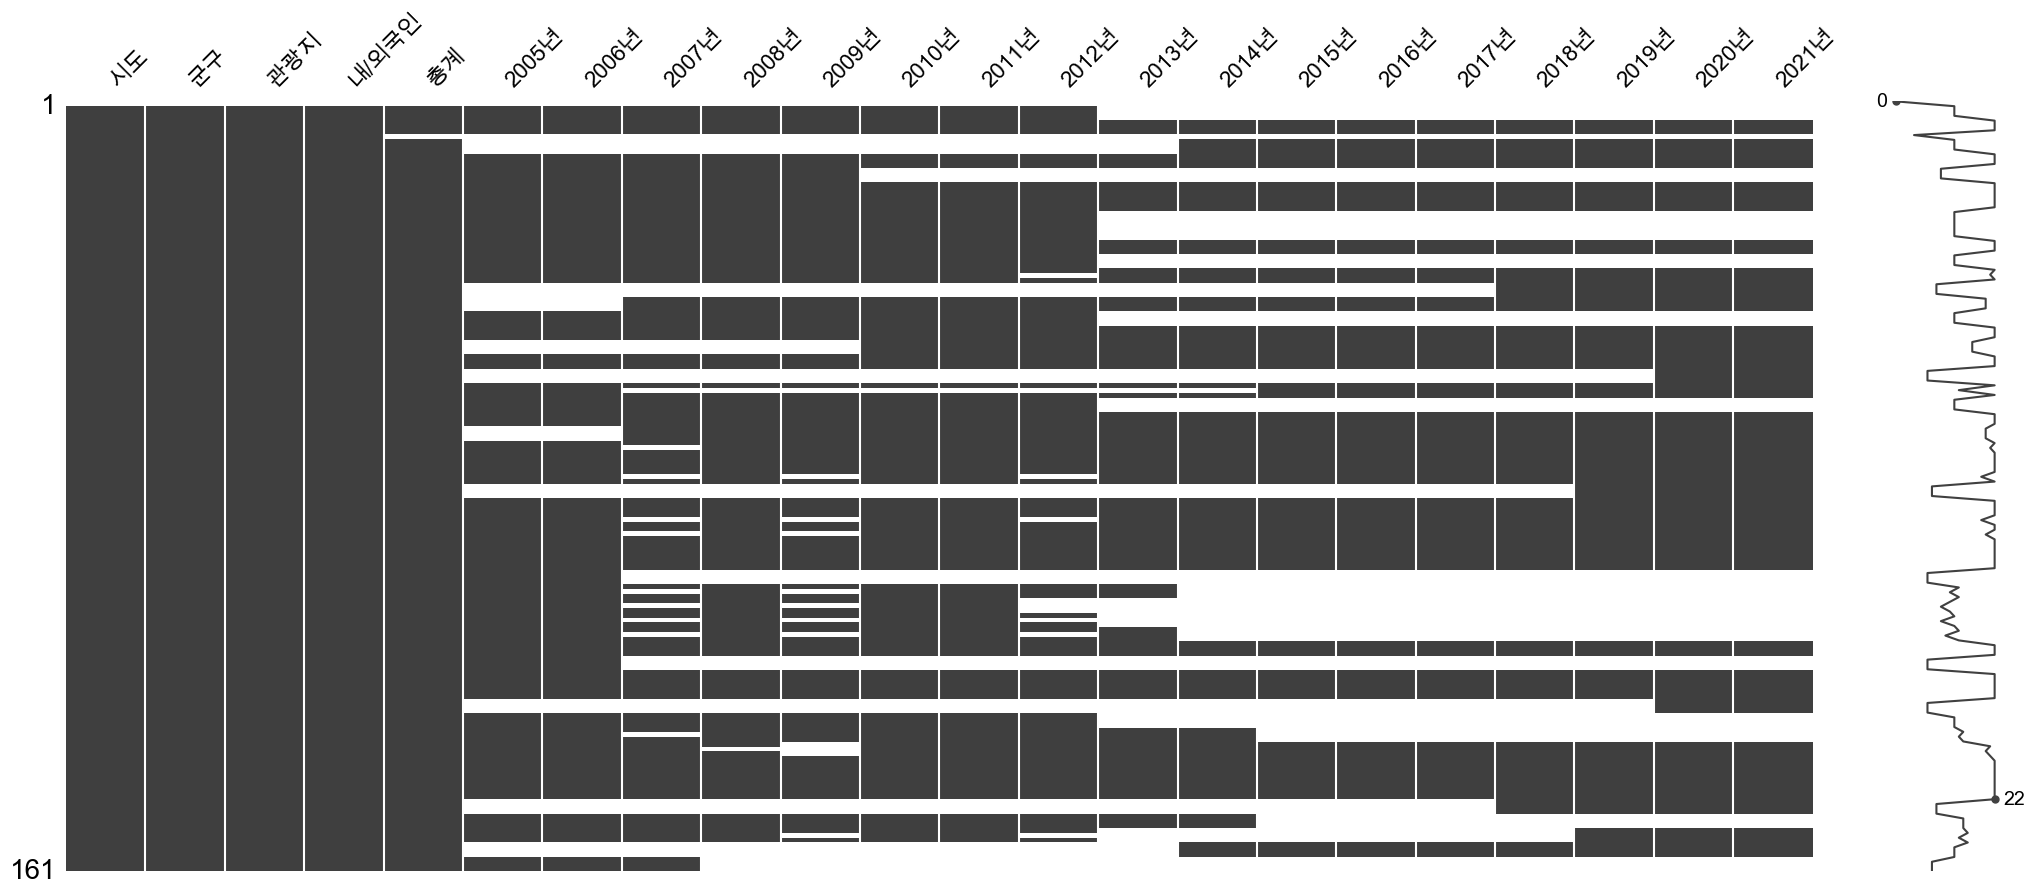

In [10]:
msno.matrix(jeju)

In [11]:
jeju = jeju.fillna(0)

In [12]:
jeju.isnull().sum()

시도       0
군구       0
관광지      0
내/외국인    0
총계       0
2005년    0
2006년    0
2007년    0
2008년    0
2009년    0
2010년    0
2011년    0
2012년    0
2013년    0
2014년    0
2015년    0
2016년    0
2017년    0
2018년    0
2019년    0
2020년    0
2021년    0
dtype: int64

In [13]:
jeju['관광지'].unique()

array([0, '(주)제주미니미니랜드', '국립제주박물관', '도립미술관', '만장굴관광지', '목석원', '민속자연사박물관',
       '비자림', '산굼부리', '삼성혈', '삼양선사유적지', '생각하는 정원', '절물자연휴양림',
       '제주도립 김창열미술관', '제주돌문화공원', '제주러브랜드', '제주목관아지', '제주별빛누리공원',
       '제주항일기념관', '제주현대미술관', '한라산국립공원', '한림공원', '항몽 유적지', '해녀 박물관',
       '감귤박물관', '기당미술관', '마라해양도립공원', '박물관은살아있다', '산방산', '서귀포도립해양공원',
       '서귀포자연휴양림', '서복전시관', '성산일출봉', '소리섬박물관', '소인국테마파크', '신영영화박물관',
       '아프리카박물관', '여미지식물원', '이중섭미술관', '익스트림 아일랜드', '일출랜드', '정방폭포',
       '제주국제평화센터', '제주민속촌박물관', '제주조각공원', '제주추사관', '중문대포해안주상절리대', '천제연폭포',
       '천지연폭포', '카멜리아힐', '테디베어뮤지엄', '퍼시픽랜드', '한화아쿠아플라넷제주', '화락원'],
      dtype=object)

In [14]:
jeju[jeju['군구'] == '제주시']

,시도,군구,관광지,내/외국인,총계,2005년,2006년,2007년,2008년,2009년,...,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
1,제주특별자치도,제주시,(주)제주미니미니랜드,내국인,2541409.0,448307.0,397859.0,339685.0,328179.0,273278.0,...,207247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,제주특별자치도,제주시,(주)제주미니미니랜드,외국인,64193.0,11254.0,7207.0,6945.0,6692.0,5561.0,...,10270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,제주특별자치도,제주시,(주)제주미니미니랜드,합계,2605602.0,459561.0,405066.0,346630.0,334871.0,278839.0,...,217517.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,제주특별자치도,제주시,국립제주박물관,내국인,4785514.0,300548.0,299704.0,212021.0,56562.0,265822.0,...,407345.0,370421.0,332779.0,349576.0,273663.0,219463.0,337930.0,358161.0,82044.0,91022.0
5,제주특별자치도,제주시,국립제주박물관,외국인,172402.0,1565.0,2026.0,2737.0,466.0,4185.0,...,16135.0,46037.0,13154.0,13572.0,32806.0,9778.0,5021.0,5356.0,850.0,489.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,제주특별자치도,제주시,항몽 유적지,외국인,17385.0,269.0,966.0,1414.0,211.0,449.0,...,196.0,553.0,609.0,376.0,573.0,670.0,2602.0,5937.0,1857.0,87.0
67,제주특별자치도,제주시,항몽 유적지,합계,1743230.0,125598.0,124207.0,116441.0,109086.0,109203.0,...,122097.0,124594.0,59161.0,61316.0,69897.0,84601.0,114795.0,119456.0,81830.0,86242.0
68,제주특별자치도,제주시,해녀 박물관,내국인,2263189.0,0.0,0.0,165747.0,199917.0,190156.0,...,185631.0,223719.0,103011.0,123178.0,146495.0,167024.0,161549.0,135659.0,33130.0,45945.0
69,제주특별자치도,제주시,해녀 박물관,외국인,261140.0,0.0,0.0,1122.0,7409.0,20170.0,...,33251.0,40522.0,22531.0,12356.0,16573.0,11272.0,23084.0,25791.0,2424.0,608.0


In [15]:
jeju[jeju['군구'] == '서귀포시']

,시도,군구,관광지,내/외국인,총계,2005년,2006년,2007년,2008년,2009년,...,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
71,제주특별자치도,서귀포시,감귤박물관,내국인,1287535.0,15309.0,77573.0,67556.0,73448.0,76236.0,...,88007.0,61365.0,50863.0,79508.0,88023.0,108389.0,135857.0,124392.0,33682.0,48654.0
72,제주특별자치도,서귀포시,감귤박물관,외국인,17976.0,116.0,754.0,0.0,247.0,829.0,...,1069.0,683.0,1386.0,1160.0,1543.0,1304.0,1357.0,2145.0,31.0,61.0
73,제주특별자치도,서귀포시,감귤박물관,합계,1305511.0,15425.0,78327.0,67556.0,73695.0,77065.0,...,89076.0,62048.0,52249.0,80668.0,89566.0,109693.0,137214.0,126537.0,33713.0,48715.0
74,제주특별자치도,서귀포시,기당미술관,내국인,184767.0,6961.0,8034.0,4963.0,6034.0,6470.0,...,10150.0,10190.0,9010.0,8821.0,10376.0,16995.0,21999.0,26212.0,7224.0,12955.0
75,제주특별자치도,서귀포시,기당미술관,외국인,1067.0,71.0,72.0,39.0,49.0,39.0,...,105.0,6.0,77.0,53.0,299.0,108.0,45.0,49.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,제주특별자치도,서귀포시,한화아쿠아플라넷제주,외국인,474455.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,60425.0,221937.0,45467.0,58319.0,75879.0,11520.0,908.0
157,제주특별자치도,서귀포시,한화아쿠아플라넷제주,합계,8150696.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1234927.0,1238617.0,1416815.0,1230235.0,995558.0,903687.0,455219.0,675638.0
158,제주특별자치도,서귀포시,화락원,내국인,478767.0,182298.0,155175.0,141294.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,제주특별자치도,서귀포시,화락원,외국인,1501.0,723.0,553.0,225.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
year = jeju.loc[:, '2005년':'2021년'].sum()
year

2005년    31559264.0
2006년    40106754.0
2007년    33427244.0
2008년    34439826.0
2009년    36719528.0
2010년    40238650.0
2011년    42518280.0
2012년    39873786.0
2013년    33186006.0
2014년    33530840.0
2015년    34157904.0
2016년    35914682.0
2017년    32770988.0
2018년    29628136.0
2019년    31105588.0
2020년    15352226.0
2021년    16941320.0
dtype: float64

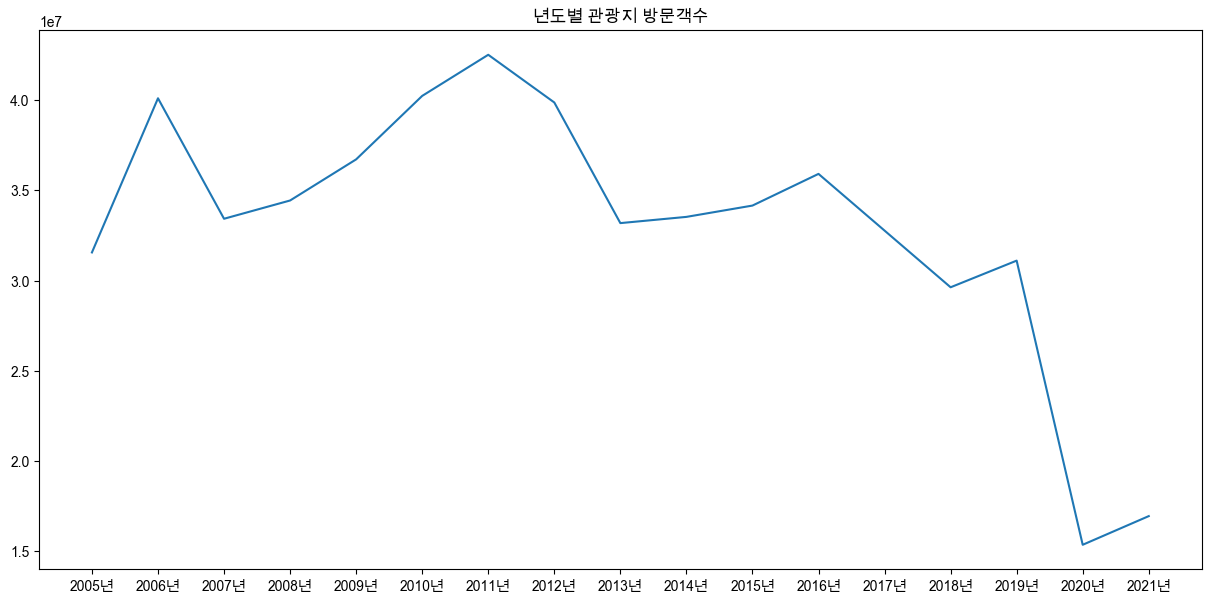

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(year.values.squeeze())
plt.title('년도별 관광지 방문객수')
plt.xticks(range(len(year)), year.index)
plt.show()

In [18]:
most = pd.DataFrame([jeju[jeju[i] == max(jeju[i])].squeeze() for i in jeju.loc[:, '2005년':'2021년'].columns]).reset_index(drop=True)
most

,시도,군구,관광지,내/외국인,총계,2005년,2006년,2007년,2008년,2009년,...,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,제주특별자치도,서귀포시,천지연폭포,합계,25914240.0,1534844.0,1571099.0,1423446.0,1477775.0,1507514.0,...,1745396.0,1702413.0,1706339.0,1812898.0,1989344.0,1807671.0,1394942.0,1323545.0,715436.0,814491.0
1,제주특별자치도,서귀포시,산방산,합계,13237870.0,835504.0,3382679.0,741122.0,783045.0,768554.0,...,676016.0,645648.0,532284.0,510658.0,514471.0,642254.0,462812.0,492880.0,379224.0,252676.0
2,제주특별자치도,서귀포시,천지연폭포,합계,25914240.0,1534844.0,1571099.0,1423446.0,1477775.0,1507514.0,...,1745396.0,1702413.0,1706339.0,1812898.0,1989344.0,1807671.0,1394942.0,1323545.0,715436.0,814491.0
3,제주특별자치도,서귀포시,천지연폭포,합계,25914240.0,1534844.0,1571099.0,1423446.0,1477775.0,1507514.0,...,1745396.0,1702413.0,1706339.0,1812898.0,1989344.0,1807671.0,1394942.0,1323545.0,715436.0,814491.0
4,제주특별자치도,서귀포시,성산일출봉,합계,33350724.0,1209963.0,1092097.0,1183446.0,1393883.0,1606447.0,...,2924401.0,3181695.0,3404951.0,3010243.0,3169913.0,2158878.0,1822660.0,1707913.0,560050.0,482990.0
5,제주특별자치도,서귀포시,성산일출봉,합계,33350724.0,1209963.0,1092097.0,1183446.0,1393883.0,1606447.0,...,2924401.0,3181695.0,3404951.0,3010243.0,3169913.0,2158878.0,1822660.0,1707913.0,560050.0,482990.0
6,제주특별자치도,서귀포시,성산일출봉,합계,33350724.0,1209963.0,1092097.0,1183446.0,1393883.0,1606447.0,...,2924401.0,3181695.0,3404951.0,3010243.0,3169913.0,2158878.0,1822660.0,1707913.0,560050.0,482990.0
7,제주특별자치도,서귀포시,성산일출봉,합계,33350724.0,1209963.0,1092097.0,1183446.0,1393883.0,1606447.0,...,2924401.0,3181695.0,3404951.0,3010243.0,3169913.0,2158878.0,1822660.0,1707913.0,560050.0,482990.0
8,제주특별자치도,서귀포시,성산일출봉,합계,33350724.0,1209963.0,1092097.0,1183446.0,1393883.0,1606447.0,...,2924401.0,3181695.0,3404951.0,3010243.0,3169913.0,2158878.0,1822660.0,1707913.0,560050.0,482990.0
9,제주특별자치도,서귀포시,성산일출봉,합계,33350724.0,1209963.0,1092097.0,1183446.0,1393883.0,1606447.0,...,2924401.0,3181695.0,3404951.0,3010243.0,3169913.0,2158878.0,1822660.0,1707913.0,560050.0,482990.0


In [19]:
local = jeju[jeju['내/외국인'] == '내국인']
local

,시도,군구,관광지,내/외국인,총계,2005년,2006년,2007년,2008년,2009년,...,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
1,제주특별자치도,제주시,(주)제주미니미니랜드,내국인,2541409.0,448307.0,397859.0,339685.0,328179.0,273278.0,...,207247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,제주특별자치도,제주시,국립제주박물관,내국인,4785514.0,300548.0,299704.0,212021.0,56562.0,265822.0,...,407345.0,370421.0,332779.0,349576.0,273663.0,219463.0,337930.0,358161.0,82044.0,91022.0
8,제주특별자치도,제주시,도립미술관,내국인,744449.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,87322.0,142200.0,109270.0,91256.0,125093.0,126085.0,26123.0,37100.0
11,제주특별자치도,제주시,만장굴관광지,내국인,9288209.0,386575.0,389596.0,441638.0,400946.0,480517.0,...,644004.0,665682.0,576281.0,690838.0,704648.0,777643.0,678984.0,565772.0,300484.0,328398.0
14,제주특별자치도,제주시,목석원,내국인,639844.0,225083.0,175847.0,113081.0,91098.0,34735.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,제주특별자치도,제주시,민속자연사박물관,내국인,9616538.0,781958.0,848032.0,833399.0,894349.0,834665.0,...,722635.0,582701.0,422494.0,376382.0,345149.0,316802.0,408872.0,307168.0,50584.0,80057.0
20,제주특별자치도,제주시,비자림,내국인,7562721.0,108520.0,102767.0,116581.0,110791.0,124877.0,...,325466.0,453110.0,544914.0,717089.0,805658.0,894318.0,863646.0,796129.0,607384.0,613893.0
23,제주특별자치도,제주시,산굼부리,내국인,5028764.0,746137.0,686563.0,620345.0,652774.0,555342.0,...,468677.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,제주특별자치도,제주시,삼성혈,내국인,692507.0,104780.0,104033.0,81457.0,103911.0,75565.0,...,67910.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,제주특별자치도,제주시,삼양선사유적지,내국인,585705.0,10933.0,23389.0,36243.0,46911.0,49098.0,...,33112.0,35367.0,35654.0,41292.0,41728.0,47964.0,54536.0,47217.0,16085.0,14779.0


In [20]:
local = local.loc[:, '2005년':'2021년'].sum()
local

2005년    14879056.0
2006년    18969164.0
2007년    15541069.0
2008년    15938796.0
2009년    16688184.0
2010년    18440636.0
2011년    19268996.0
2012년    17206273.0
2013년    13616593.0
2014년    13211580.0
2015년    14481883.0
2016년    14816728.0
2017년    15378317.0
2018년    13810066.0
2019년    14221336.0
2020년     7529269.0
2021년     8438095.0
dtype: float64

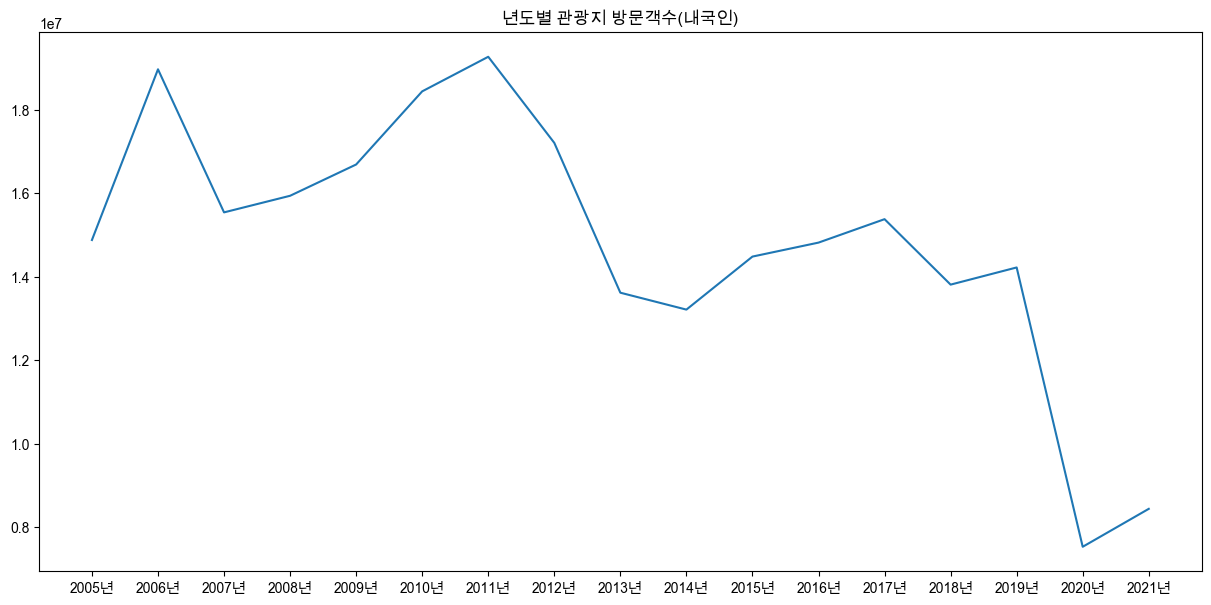

In [21]:
plt.figure(figsize=(15, 7))
plt.plot(local.values.squeeze())
plt.title('년도별 관광지 방문객수(내국인)')
plt.xticks(range(len(local)), local.index)
plt.show()

In [22]:
foreigner = jeju[jeju['내/외국인'] == '외국인']
foreigner

,시도,군구,관광지,내/외국인,총계,2005년,2006년,2007년,2008년,2009년,...,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
2,제주특별자치도,제주시,(주)제주미니미니랜드,외국인,64193.0,11254.0,7207.0,6945.0,6692.0,5561.0,...,10270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,제주특별자치도,제주시,국립제주박물관,외국인,172402.0,1565.0,2026.0,2737.0,466.0,4185.0,...,16135.0,46037.0,13154.0,13572.0,32806.0,9778.0,5021.0,5356.0,850.0,489.0
9,제주특별자치도,제주시,도립미술관,외국인,12844.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1940.0,2028.0,3148.0,2143.0,1006.0,708.0,1494.0,377.0
12,제주특별자치도,제주시,만장굴관광지,외국인,1066649.0,16968.0,13205.0,11734.0,13205.0,92337.0,...,115632.0,112159.0,98492.0,63740.0,85160.0,55226.0,78488.0,76761.0,10364.0,7086.0
15,제주특별자치도,제주시,목석원,외국인,238114.0,69724.0,63211.0,51219.0,42042.0,11918.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,제주특별자치도,제주시,민속자연사박물관,외국인,2658479.0,55691.0,80203.0,128541.0,104560.0,106266.0,...,171320.0,263264.0,374213.0,380933.0,531025.0,88877.0,41727.0,84203.0,9644.0,328.0
21,제주특별자치도,제주시,비자림,외국인,36700.0,317.0,423.0,776.0,423.0,229.0,...,2039.0,8731.0,6695.0,2386.0,2345.0,2237.0,3865.0,3696.0,561.0,503.0
24,제주특별자치도,제주시,산굼부리,외국인,206420.0,18715.0,24882.0,26513.0,25060.0,35897.0,...,12491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,제주특별자치도,제주시,삼성혈,외국인,580155.0,66759.0,70429.0,73455.0,81829.0,86032.0,...,62331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,제주특별자치도,제주시,삼양선사유적지,외국인,6068.0,190.0,254.0,102.0,103.0,217.0,...,138.0,147.0,191.0,754.0,1589.0,998.0,610.0,514.0,41.0,29.0


In [23]:
foreigner = foreigner.loc[:, '2005년':'2021년'].sum()
foreigner

2005년     900576.0
2006년    1084213.0
2007년    1172553.0
2008년    1281117.0
2009년    1671580.0
2010년    1678689.0
2011년    1990144.0
2012년    2730620.0
2013년    2976410.0
2014년    3553840.0
2015년    2597069.0
2016년    3140613.0
2017년    1007177.0
2018년    1004002.0
2019년    1331458.0
2020년     146844.0
2021년      32565.0
dtype: float64

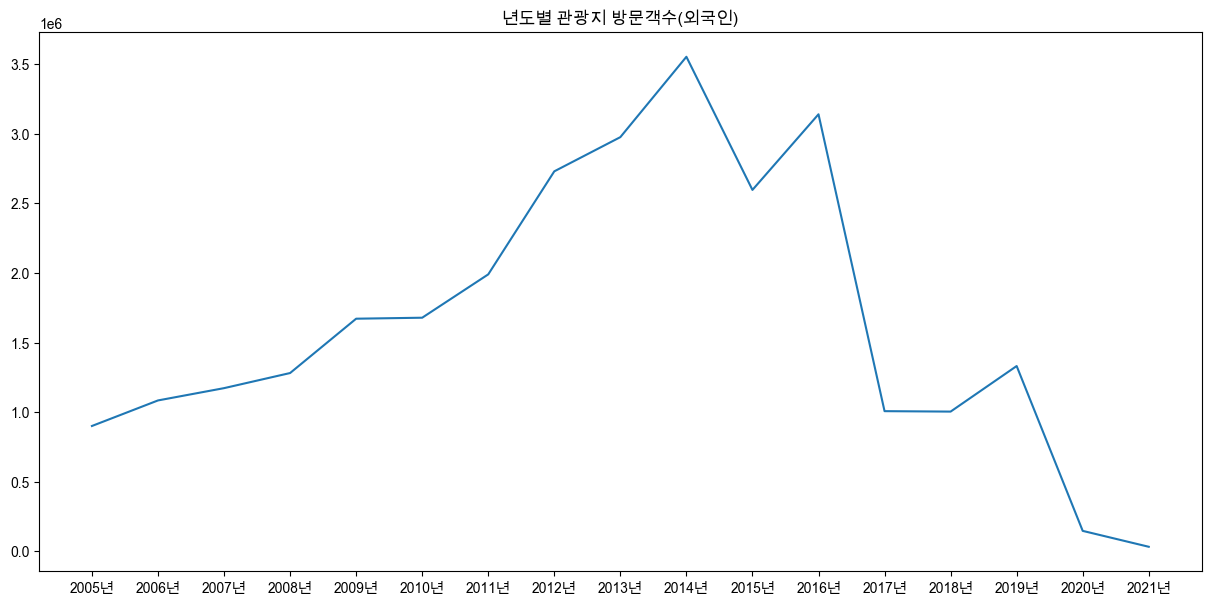

In [24]:
plt.figure(figsize=(15, 7))
plt.plot(foreigner.values.squeeze())
plt.title('년도별 관광지 방문객수(외국인)')
plt.xticks(range(len(foreigner)), foreigner.index)
plt.show()